In [248]:
import os

import pandas as pd
import numpy as np

from sklearn import preprocessing, metrics
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedShuffleSplit
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

import matplotlib.pyplot as plt

In [249]:
print os.listdir('../datasets/input')

['test.csv', 'train.csv', 'ni.csv']


In [264]:
# df = pd.read_csv('../datasets/input/ni.csv')
# X = df.drop(['class'], axis=1)
# y = df['class'].values.astype(object)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

train = shuffle(pd.read_csv('../datasets/input/train.csv'))
test = shuffle(pd.read_csv('../datasets/input/test.csv'))

X_train = train.drop(['class'], axis=1)
y_train = train['class'].values
X_test = test.drop(['class'], axis=1)
y_test = test['class'].values

print X_train.shape, X_test.shape

(128, 39) (64, 39)


In [265]:
X_train.head(n=10)

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,z10,m1,m2,m3,m4,m5,mtot,fermi,band,toten
87,0.277034,0.275634,1.505647,0.006700,1.466444,1.982563,0.036535,1.841725,0.748080,0.610850,...,1.123709,0.221966,0.972806,0.179098,0.650185,0.469422,2.493476,0.487224,-86.595609,-10.411169
70,0.403874,1.083836,0.641635,1.413465,1.751130,0.206473,0.188207,1.551869,0.808873,0.826935,...,1.714872,0.586911,0.519162,0.836658,0.753116,0.930318,3.626164,-0.425381,-105.430714,-27.407032
15,0.973363,1.659942,0.522293,0.320035,1.652681,0.248776,0.660007,0.820495,1.658719,1.204976,...,0.849016,0.554312,0.675369,0.344794,0.357240,0.826529,2.758245,0.723024,-118.461510,-8.925106
2,1.802871,1.236479,1.487446,0.603173,1.635435,0.690753,0.682138,0.145997,0.845390,1.674235,...,0.394640,0.323629,0.924925,0.005358,0.078917,0.131187,1.464016,0.460717,-71.408598,-29.068981
62,1.211326,0.721915,0.142585,1.954344,1.768460,0.247730,0.648723,1.230711,0.569418,1.351118,...,1.499651,0.942338,0.833201,0.727071,0.904766,0.394196,3.801572,-0.434147,-128.104391,-6.833711
119,0.656743,0.995390,0.049035,0.030884,1.063832,0.768879,0.472398,0.725184,1.810348,1.180701,...,1.806263,0.229280,0.229002,0.117416,0.664401,0.151424,1.391523,0.828299,-72.647041,-31.062702
51,1.241279,1.458861,1.602305,1.272903,0.436380,0.827199,0.186876,0.207720,0.784321,0.821709,...,1.788867,0.203190,0.073174,0.841337,0.886530,0.256446,2.260677,-0.349211,-119.332102,-36.418155
26,0.391476,0.127394,0.239465,1.976987,1.961308,1.224274,0.527980,0.565476,1.099089,1.750463,...,1.985790,0.414693,0.217899,0.854972,0.782541,0.086332,2.356437,0.004324,-62.278363,-39.192820
22,1.034041,0.712960,1.999470,1.727061,0.974777,0.412137,1.053821,1.058074,0.835050,1.871116,...,1.663524,0.348331,0.810999,0.765767,0.489113,0.949077,3.363286,0.602663,-83.777638,-2.087500
48,1.230539,0.650832,1.506349,0.041783,1.984103,0.012929,0.065340,0.433508,0.720790,1.890480,...,0.734341,0.799607,0.824893,0.932496,0.331227,0.059829,2.948052,-0.001597,-136.662303,-35.967673


In [275]:
grid_params = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
clf = GridSearchCV(SVC(), grid_params, cv=5)
clf.fit(X_train, y_train)

print clf.best_params_

{'kernel': 'linear', 'C': 10}


/usr/local/lib/python2.7/site-packages/sklearn/model_selection/_search.py:842: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [276]:
print metrics.accuracy_score(y_pred, y_test)

0.515625


In [272]:
print confusion_matrix(y_test, y_pred)
print classification_report(y_test, y_pred)

[[16 16]
 [15 17]]
              precision    recall  f1-score   support

           0       0.52      0.50      0.51        32
           1       0.52      0.53      0.52        32

   micro avg       0.52      0.52      0.52        64
   macro avg       0.52      0.52      0.52        64
weighted avg       0.52      0.52      0.52        64



0.515625


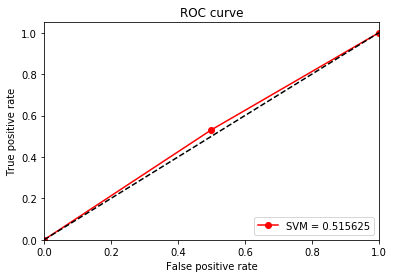

In [273]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

print roc_auc

plt.figure()
plt.plot(fpr, tpr, 'ro-', label='SVM = %f' %roc_auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()